In [5]:
import pandas as pd

# Charger le CSV
df = pd.read_csv("../data/dataset_selection.csv")

# Aperçu du dataset
print("Aperçu du dataset :")
print(df.head())

print("\nInformations générales :")
print(df.info())


Aperçu du dataset :
                                                path     label
0  E:\mémoire\Memoire\data\glaucome\ACRIMA\ACRIMA...  glaucome
1  E:\mémoire\Memoire\data\glaucome\ACRIMA\ACRIMA...  glaucome
2  E:\mémoire\Memoire\data\glaucome\ACRIMA\ACRIMA...  glaucome
3  E:\mémoire\Memoire\data\glaucome\ACRIMA\ACRIMA...  glaucome
4  E:\mémoire\Memoire\data\glaucome\ACRIMA\ACRIMA...  glaucome

Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9563 entries, 0 to 9562
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9563 non-null   object
 1   label   9563 non-null   object
dtypes: object(2)
memory usage: 149.5+ KB
None


In [6]:
print(f"Nombre total d'images : {len(df)}")
print(f"Nombre de colonnes : {df.shape[1]}")


Nombre total d'images : 9563
Nombre de colonnes : 2


In [7]:
# Compter le nombre d'images par label
class_counts = df['label'].value_counts()

print("\nRépartition des labels :")
print(class_counts)

# Pourcentage par label
class_percent = df['label'].value_counts(normalize=True) * 100
print("\nPourcentage par label :")
print(class_percent.round(2))



Répartition des labels :
label
glaucome    2517
diabete     2500
normaux     2500
mda         2046
Name: count, dtype: int64

Pourcentage par label :
label
glaucome    26.32
diabete     26.14
normaux     26.14
mda         21.39
Name: proportion, dtype: float64


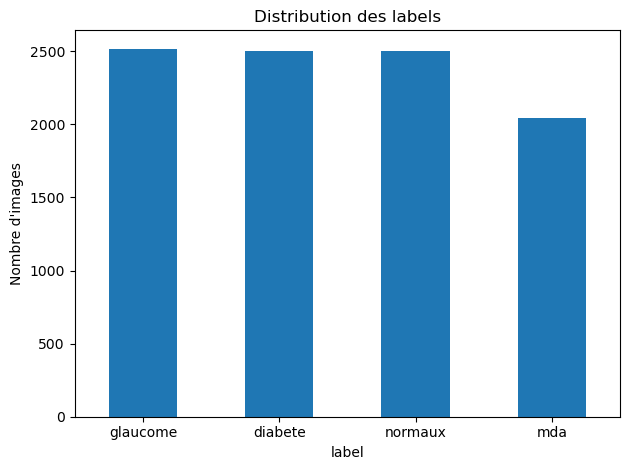

In [8]:
import matplotlib.pyplot as plt

class_counts.plot(kind='bar')
plt.title("Distribution des labels")
plt.xlabel("label")
plt.ylabel("Nombre d'images")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [9]:
for classe in df['label'].unique():
    print(f"\nExemples pour la classe '{classe}' :")
    print(df[df['label'] == classe]['path'].head(3).tolist())



Exemples pour la classe 'glaucome' :
['E:\\mémoire\\Memoire\\data\\glaucome\\ACRIMA\\ACRIMA\\NOT PARTITIONED\\glaucoma\\Im310_g_ACRIMA.jpg', 'E:\\mémoire\\Memoire\\data\\glaucome\\ACRIMA\\ACRIMA\\NOT PARTITIONED\\glaucoma\\Im311_g_ACRIMA.jpg', 'E:\\mémoire\\Memoire\\data\\glaucome\\ACRIMA\\ACRIMA\\NOT PARTITIONED\\glaucoma\\Im312_g_ACRIMA.jpg']

Exemples pour la classe 'mda' :
['E:\\mémoire\\Memoire\\data\\mda\\AMDNet23 Fundus Image Dataset for  Age-Related Macular Degeneration Disease Detection\\AMDNet23 Fundus Image Dataset for  Age-Related Macular Degeneration Disease Detection\\AMDNet23 Dataset\\train\\amd\\1012.jpg', 'E:\\mémoire\\Memoire\\data\\mda\\AMDNet23 Fundus Image Dataset for  Age-Related Macular Degeneration Disease Detection\\AMDNet23 Fundus Image Dataset for  Age-Related Macular Degeneration Disease Detection\\AMDNet23 Dataset\\train\\amd\\1013.jpg', 'E:\\mémoire\\Memoire\\data\\mda\\AMDNet23 Fundus Image Dataset for  Age-Related Macular Degeneration Disease Detection\

In [10]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(
    df,
    test_size=0.2,
    stratify=df['label'],
    random_state=42
)




print("Tailles des splits :")
print(f"Train : {len(df_train)}")
print(f"Test : {len(df_test)}")


Tailles des splits :
Train : 7650
Test : 1913


In [11]:
def show_distribution(name, data):
    print(f"\n{name}")
    print(data['label'].value_counts(normalize=True).round(3))

show_distribution("Train", df_train)
show_distribution("Test", df_test)



Train
label
glaucome    0.263
diabete     0.261
normaux     0.261
mda         0.214
Name: proportion, dtype: float64

Test
label
glaucome    0.263
normaux     0.261
diabete     0.261
mda         0.214
Name: proportion, dtype: float64


In [12]:
import cv2
import numpy as np
import os

def augment_image(img):
    aug_images = []

    # rotation
    for angle in [-15, 15]:
        h, w = img.shape[:2]
        M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1)
        aug_images.append(cv2.warpAffine(img, M, (w, h)))

    # flip
    aug_images.append(cv2.flip(img, 1))

    return aug_images


In [13]:
import cv2
import numpy as np
from skimage.feature import hog

def extract_hog(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))

    features = hog(
        img,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2-Hys'
    )
    return features


In [14]:
import pandas as pd
import os

X = []
y = []

for _, row in df.iterrows():
    img_path = row["path"]
    label = row["label"]

    if os.path.exists(img_path):
        X.append(extract_hog(img_path))
        y.append(label)

X = np.array(X)
y = np.array(y)


error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
